In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv("D:/7th SEM/CSDF/CSDF Assignment/vpndataset.csv")
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class
0,9368711,16,4,1564818,1549373,190205.2857,203290.4565,389822.3919,370323.7198,10.353612,...,267600.1984,1871488,1983656.333,2195089,1.832197e+05,1234883,1420565.0,1523088,161096.5393,Non-VPN
1,7340238,18,4,1567554,1527893,165686.9773,186914.8462,317267.5487,304370.6513,11.580006,...,221462.8620,1491627,3572433.000,5653239,2.942704e+06,1131498,1324636.0,1517774,273138.3790,Non-VPN
2,4644225,29,15,1270547,1079974,165865.1786,195302.1304,329473.1263,300492.5882,11.412022,...,217475.4252,1758922,1758922.000,1758922,0.000000e+00,1079974,1079974.0,1079974,0.0000,Non-VPN
3,4978735,19,8,2492050,2457286,239543.2500,276596.3889,612435.3042,628339.5735,8.034169,...,436959.7164,1710925,2382905.000,3054885,9.503232e+05,1346073,1894031.5,2441990,774930.3423,Non-VPN
4,11838189,19,10,3094089,3093543,243766.5000,295954.7250,599721.7817,625632.7040,7.602514,...,436129.6393,1747431,2400446.000,3240696,6.232744e+05,1394455,1983227.0,3042717,725987.8291,Non-VPN


In [65]:
df.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,...,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04
mean,9.791705e+06,6.086783e+05,6.267802e+05,3.314204e+06,2.861716e+06,1.003929e+06,9.218250e+05,8.448286e+05,6.133578e+05,2073.780095,...,4.768167e+05,1.035025e+06,3.253846e+06,3.635654e+06,4.091204e+06,5.025001e+05,2.983753e+06,3.325142e+06,3.732466e+06,4.531389e+05
std,1.438458e+07,2.243195e+06,2.326442e+06,1.062115e+07,9.652561e+06,3.141855e+06,2.495984e+06,4.336559e+06,2.516395e+06,19115.713624,...,1.404428e+06,3.534085e+06,1.342955e+07,1.356162e+07,1.400211e+07,2.813959e+06,1.334323e+07,1.347430e+07,1.390155e+07,2.785573e+06
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.346690e+05,7.000000e+00,2.000000e+00,2.597050e+04,2.454225e+04,1.154333e+04,5.626786e+03,1.145469e+02,0.000000e+00,2.599190,...,9.577449e+03,5.574602e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,1.109263e+07,6.200000e+01,2.100000e+01,2.821430e+05,2.865800e+05,5.104959e+04,3.526250e+04,1.164916e+04,9.605910e+03,11.681220,...,8.412602e+04,7.518175e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,1.494537e+07,1.645000e+03,1.651000e+03,4.289454e+06,4.265465e+06,5.260302e+05,4.843726e+05,6.055940e+05,5.340370e+05,100.671695,...,3.119330e+05,7.659213e+05,2.767727e+06,4.248512e+06,5.690602e+06,0.000000e+00,1.943930e+06,3.333185e+06,4.696002e+06,0.000000e+00
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,...,6.070000e+07,1.360000e+08,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08


In [66]:
df.columns.values

array(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat',
       'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat',
       'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active',
       'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle',
       'max_idle', 'std_idle', 'class'], dtype=object)

In [67]:
for var in df.columns:
    print(var, len(df[var]))

duration 18758
total_fiat 18758
total_biat 18758
min_fiat 18758
min_biat 18758
max_fiat 18758
max_biat 18758
mean_fiat 18758
mean_biat 18758
flowPktsPerSecond 18758
flowBytesPerSecond 18758
min_flowiat 18758
max_flowiat 18758
mean_flowiat 18758
std_flowiat 18758
min_active 18758
mean_active 18758
max_active 18758
std_active 18758
min_idle 18758
mean_idle 18758
max_idle 18758
std_idle 18758
class 18758


In [68]:
df.isna()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df.isin([0]).sum()


duration                532
total_fiat              203
total_biat              520
min_fiat                  0
min_biat                  0
max_fiat               2641
max_biat               3637
mean_fiat              4640
mean_biat              5034
flowPktsPerSecond       532
flowBytesPerSecond      532
min_flowiat             913
max_flowiat               0
mean_flowiat            532
std_flowiat            2926
min_active                0
mean_active           11355
max_active                0
std_active            14935
min_idle                  0
mean_idle             11355
max_idle                  0
std_idle              14935
class                     0
dtype: int64

In [70]:
df.dropna()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class
0,9368711,16,4,1564818,1549373,190205.2857,203290.4565,389822.3919,370323.7198,10.353612,...,267600.1984,1871488,1983656.333,2195089,1.832197e+05,1234883,1420565.0,1523088,161096.5393,Non-VPN
1,7340238,18,4,1567554,1527893,165686.9773,186914.8462,317267.5487,304370.6513,11.580006,...,221462.8620,1491627,3572433.000,5653239,2.942704e+06,1131498,1324636.0,1517774,273138.3790,Non-VPN
2,4644225,29,15,1270547,1079974,165865.1786,195302.1304,329473.1263,300492.5882,11.412022,...,217475.4252,1758922,1758922.000,1758922,0.000000e+00,1079974,1079974.0,1079974,0.0000,Non-VPN
3,4978735,19,8,2492050,2457286,239543.2500,276596.3889,612435.3042,628339.5735,8.034169,...,436959.7164,1710925,2382905.000,3054885,9.503232e+05,1346073,1894031.5,2441990,774930.3423,Non-VPN
4,11838189,19,10,3094089,3093543,243766.5000,295954.7250,599721.7817,625632.7040,7.602514,...,436129.6393,1747431,2400446.000,3240696,6.232744e+05,1394455,1983227.0,3042717,725987.8291,Non-VPN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18753,73240,-1,-1,-1,-1,0.0000,0.0000,0.0000,0.0000,27.307482,...,0.0000,-1,0.000,-1,0.000000e+00,-1,0.0,-1,0.0000,Non-VPN
18754,52083,-1,-1,-1,-1,0.0000,0.0000,0.0000,0.0000,38.400246,...,0.0000,-1,0.000,-1,0.000000e+00,-1,0.0,-1,0.0000,Non-VPN
18755,67923,-1,-1,-1,-1,0.0000,0.0000,0.0000,0.0000,29.445107,...,0.0000,-1,0.000,-1,0.000000e+00,-1,0.0,-1,0.0000,Non-VPN
18756,313588,-1,-1,-1,-1,0.0000,0.0000,0.0000,0.0000,6.377795,...,0.0000,-1,0.000,-1,0.000000e+00,-1,0.0,-1,0.0000,Non-VPN


In [71]:
df=df.drop(df[df['duration']==0].index,inplace=False)
df.shape

(18226, 24)

In [72]:
df=df.drop(df[df['total_fiat']<=0].index,inplace=False)
df=df.drop(df[df['total_biat']<=0].index,inplace=False)
df=df.drop(df[df['min_active']<=0].index,inplace=False)
df=df.drop(['std_idle'],axis=1,inplace=False)
df.shape

(6853, 23)

In [73]:
df.columns.dtype

dtype('O')

In [74]:
classlen = len(df['class'])
y = list(df['class'])
for i in range(0,classlen):
    if y[i]=="VPN":
        y[i]=1
    elif y[i]=="Non-VPN":
        y[i]=0

In [75]:
y = pd.DataFrame(y)
y.head()


,0
0,0
1,0
2,0
3,0
4,0


In [76]:
df.isin([0]).sum()


duration                 0
total_fiat               0
total_biat               0
min_fiat                 0
min_biat                 0
max_fiat                 0
max_biat                 0
mean_fiat              984
mean_biat             1030
flowPktsPerSecond        0
flowBytesPerSecond       0
min_flowiat            139
max_flowiat              0
mean_flowiat             0
std_flowiat              0
min_active               0
mean_active              0
max_active               0
std_active            3282
min_idle                 0
mean_idle                0
max_idle                 0
class                    0
dtype: int64

In [77]:
act = len(df['std_active'])
mean_std_active = df['std_active'].mean(skipna=True)
mean_mean_fiat = df['std_active'].mean(skipna=True)
mean_mean_biat = df['mean_biat'].mean(skipna=True)
mean_mean_fiat = df['mean_fiat'].mean(skipna=True)
mean_min_flowiat = df['min_flowiat'].mean(skipna=True)
mean_std_active/=10
mean_mean_biat/=10
mean_mean_fiat/=10
mean_min_flowiat


7983.408142419378

In [78]:
df=df.replace({'std_active': {0: mean_std_active}})
df=df.replace({'mean_biat': {0: mean_mean_biat}})
df=df.replace({'mean_fiat': {0: mean_mean_fiat}})
df=df.replace({'min_flowiat': {0: mean_min_flowiat}}) 
df['std_active'].head(15)

0     1.832197e+05
1     2.942704e+06
2     1.305274e+05
3     9.503232e+05
4     6.232744e+05
5     9.651035e+05
6     1.010714e+06
7     7.721215e+05
8     6.509928e+05
9     4.190281e+05
10    1.535072e+05
11    4.369835e+05
13    4.518991e+06
15    1.815508e+06
16    1.123165e+06
Name: std_active, dtype: float64

In [79]:
df.isin([0]).sum()


duration              0
total_fiat            0
total_biat            0
min_fiat              0
min_biat              0
max_fiat              0
max_biat              0
mean_fiat             0
mean_biat             0
flowPktsPerSecond     0
flowBytesPerSecond    0
min_flowiat           0
max_flowiat           0
mean_flowiat          0
std_flowiat           0
min_active            0
mean_active           0
max_active            0
std_active            0
min_idle              0
mean_idle             0
max_idle              0
class                 0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6853 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            6853 non-null   int64  
 1   total_fiat          6853 non-null   int64  
 2   total_biat          6853 non-null   int64  
 3   min_fiat            6853 non-null   int64  
 4   min_biat            6853 non-null   int64  
 5   max_fiat            6853 non-null   float64
 6   max_biat            6853 non-null   float64
 7   mean_fiat           6853 non-null   float64
 8   mean_biat           6853 non-null   float64
 9   flowPktsPerSecond   6853 non-null   float64
 10  flowBytesPerSecond  6853 non-null   float64
 11  min_flowiat         6853 non-null   float64
 12  max_flowiat         6853 non-null   int64  
 13  mean_flowiat        6853 non-null   float64
 14  std_flowiat         6853 non-null   float64
 15  min_active          6853 non-null   int64  
 16  mean_

In [81]:
y.astype(float)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
6848,0.0
6849,0.0
6850,0.0
6851,0.0


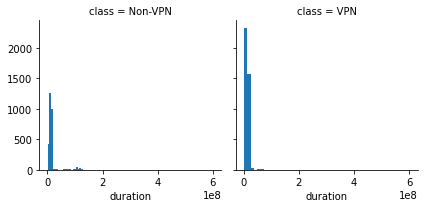

In [82]:
g = sns.FacetGrid(df, col='class')
g.map(plt.hist, 'duration', bins=50)

<AxesSubplot:>

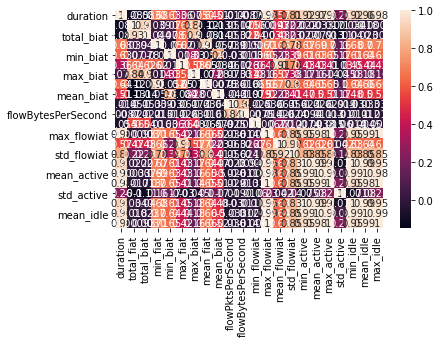

In [83]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='mean_biat', ylabel='Density'>

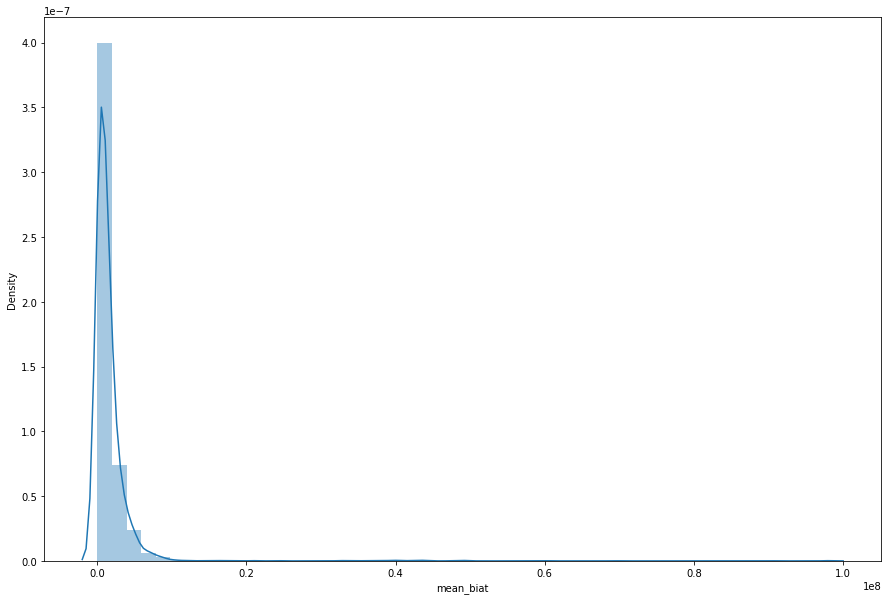

In [96]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['mean_biat'])

In [84]:
X = np.array(df.drop(['class'],1)).astype(float)

In [85]:
Y = np.array(y).astype(float)

In [86]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

In [87]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
kmeans.fit(X_scaled)

KMeans(max_iter=600, n_clusters=2)

In [89]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=2, n_jobs=1, precompute_distances='auto')

In [90]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == Y[i]:
        correct += 1
print(correct)

3954
